<a href="https://colab.research.google.com/github/alberzenon/AprendizajeAutomatico/blob/main/clasificador_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Por qué necesita los métodos del núcleo?


El objetivo de cada clasificador es predecir las clases correctamente. Para eso, el conjunto de datos debe ser separable. Mire la trama de abajo; es bastante simple ver que todos los puntos por encima de la línea negra pertenecen a la primera clase y los otros puntos a la segunda clase. Sin embargo, es extremadamente raro tener un conjunto de datos tan simple. En la mayoría de los casos, los datos no son separables. Le da a los clasificadores ingenuos como una regresión logística un momento difícil.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
x_lin = np.array([1,2,3,4,5,6,7,8,9,10])
y_lin = np.array([2,2,3,2,2,9,6,8,8,9])
label_lin = np.array([0,0,0,0,0,1,1,1,1,1])

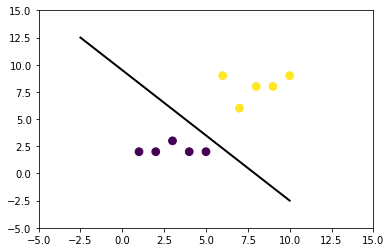

In [8]:
fig = plt.figure()
ax=fig.add_subplot(111)
plt.scatter(x_lin, y_lin, c=label_lin, s=60)
plt.plot([-2.5, 10], [12.5, -2.5], 'k-', lw=2)
ax.set_xlim([-5,15])
ax.set_ylim([-5,15])
plt.show()

En la figura siguiente, trazamos un conjunto de datos que no es linealmente separable. Si trazamos una línea recta, la mayoría de los puntos no se clasificarán en la clase correcta.

Una forma de abordar este problema es tomar el dataset y transformar los datos en otro mapa de entidades. Significa que usará una función para transformar los datos en otro plan, que debería ser lineable.

In [10]:
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

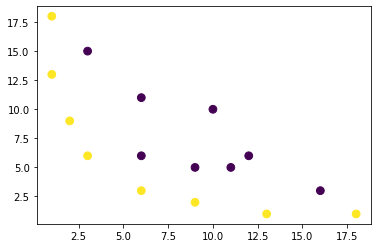

In [11]:
fig = plt.figure()
plt.scatter(x, y, c=label, s=60)
plt.show()

Los datos de la figura anterior están en un plan de dos dimensiones que no es separable. Puede intentar transformar estos datos en una dimensión de tres, es decir, crear una figura con 3 ejes.

In [18]:
### illustration purpose
def mapping(x, y):    
  x = np.c_[(x, y)]				
  if len(x) >	2:        
    x_1 = x[:,0]**2        
    x_2 = np.sqrt(2)*x[:,0]*x[:,1]        
    x_3 = x[:,1]**2								
  else:            
    x_1 = x[0]**2        
    x_2 = np.sqrt(2)*x[0]*x[1]        
    x_3 = x[1]**2			    
  trans_x = np.array([x_1, x_2, x_3])				
  return trans_x

In [19]:
#El nuevo mapeo debe tener 3 dimensiones con 16 puntos
x_1  = mapping(x, y)
x_1.shape

(3, 16)

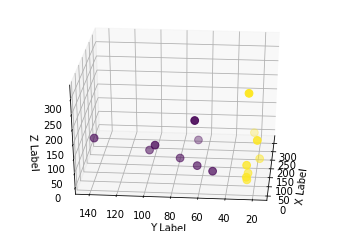

In [21]:
#Hagamos una nueva trama con 3 ejes, x, y y z respectivamente.
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=60)
ax.view_init(30, 185)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

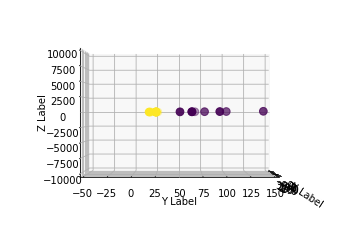

In [24]:
# Vemos una mejora, pero si cambiamos la orientación de la trama, está claro que el dataset es ahora separable
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[1], c=label, s=60)
ax.view_init(0, -180)
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()